# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)

# 1. Reading the dataset

In [2]:
# Reading dataset and storing it as pandas data frame in the object "bike"
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking number of rows and columns in the provided dataset
bike.shape

(730, 16)

In [4]:
# Checking statistical values for the numerical columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking number of non-null records and the data type of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observations
- There are 730 rows and 16 columns are present in the dataset.
- There is no missing value in any of the columns.

# 2.Data preparation

### Removing unnecessary columns

'instant' -> Showing only the count of records in the dataset will not give any insight into the analysis/model building. So, we can remove this column from the dataset

'dteday' -> year, month and weekdays are already having separate columns. So, we can drop this column.

'casual' and 'registered' -> As per the requirement, the target column is 'cnt' which is the total of 'casual' and 'registered' columns data. So, we can drop these two columns.

In [6]:
# Dropping unnecessary columns

bike = bike.drop(labels=['instant','dteday','casual','registered'],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting numeric categorical variables to categorical labels

#### Column: "season"
    1:spring, 2:summer, 3:fall, 4:winter

In [7]:
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Column: "mnth"
     - Converting the numerical representation of the months (1 to 12) to string (Jan to Dec)

In [8]:
# Creating a function to convert the numeric month values to categorical labels
def month_name(x):
    month = date(1900, x , 1).strftime('%b') 
    return (month)

In [9]:
bike['mnth'] = bike['mnth'].apply(month_name)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Column: "weekday"
    - converting the numerical representation of weekdays (0 to 6) to string (sun to sat).

In [10]:
bike['weekday'] =bike['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Column: "weathersit"
    1: clear (Clear, Few clouds, Partly cloudy, Partly cloudy)
    2: cloudy (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    3: light_rain (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    4: heavy_rain (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)


In [11]:
bike['weathersit'] = bike['weathersit'].map({1:'clear',2:'cloudy',3:'light_rain',4:'heavy_rain'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Notes
Columns 'yr', 'holiday' and 'workingday' are binary columns. So, we don't need to convert the values as categorical labels.

# 3.Data visualization
## Univariate analysis:

Plotting heatmap for the numeric columns.

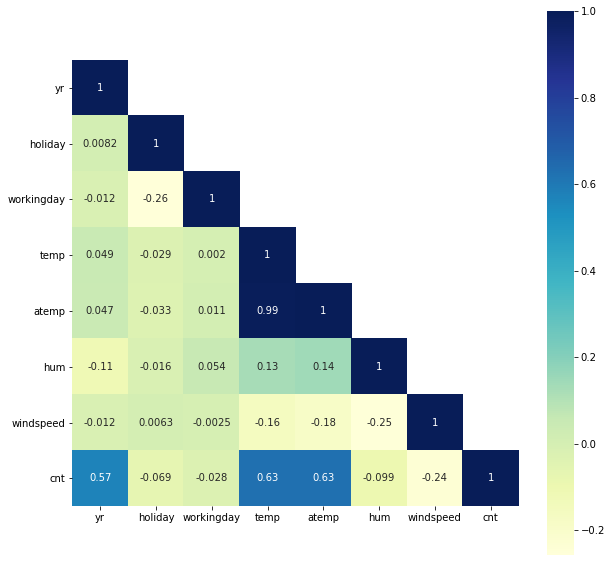

In [12]:
mask= np.array(bike.corr())
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(bike.corr(),mask=mask, square=True,cmap='YlGnBu',annot=True)
plt.show()

### Observations

- Columns 'yr', 'temp', 'atemp' and 'windspeed' are having significant correlation with the target variable 'cnt'


- Columns 'temp' and 'atemp' are having a very high correlation (nearly 1). So, we can validate visually using a scatter plot.
    - temp : temperature in Celsius
    - atemp: feeling temperature in Celsius

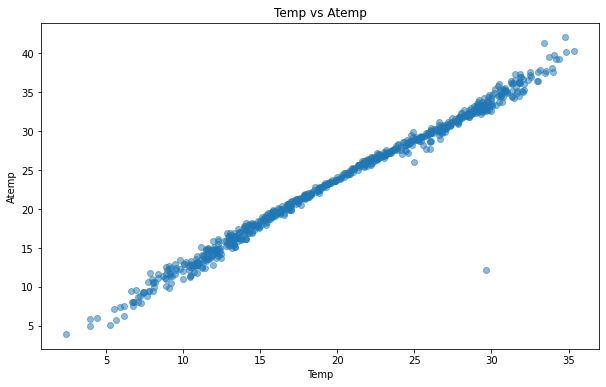

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x='temp',y='atemp',data=bike, alpha=0.5)
plt.xlabel('Temp')
plt.ylabel('Atemp')
plt.title('Temp vs Atemp')
plt.show()

- With the above plot, we can see columns 'temp' and 'atemp' are highly correlated and we can drop 'atemp' column from the dataset.

In [14]:
bike = bike.drop('atemp',axis=1)

#### Boxplot

- To visualize how are the data distributed.

In [15]:
# Total columns in the current dataset.
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
# Numeric columns in the dataset.
bike.describe().columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

- Columns 'yr', 'holiday' and 'workingday' are binary data attributes and they are not having abnormal values.
- So, we can plot a boxplot for the other numeric columns.

In [17]:
Num_cols = ['temp','hum','windspeed','cnt']

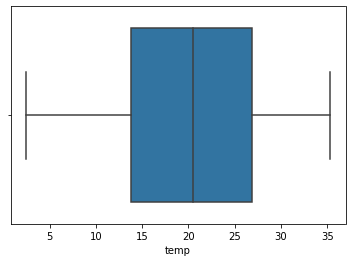

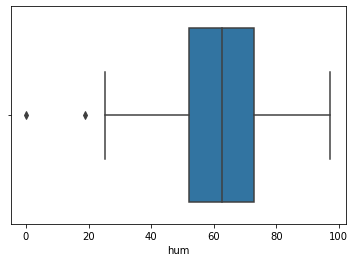

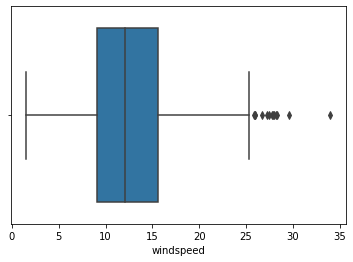

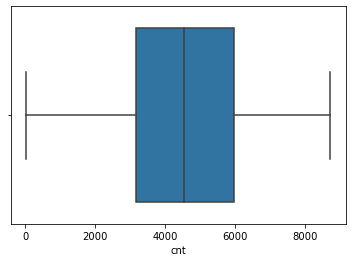

In [18]:
for i in Num_cols:
    sns.boxplot(bike[i])
    plt.show()

### Observation
- There is no abnormal data outlier/anomalies present to handle in the columns 'temp', 'hum' and 'windspeep'.

Boxplot for categorical columns

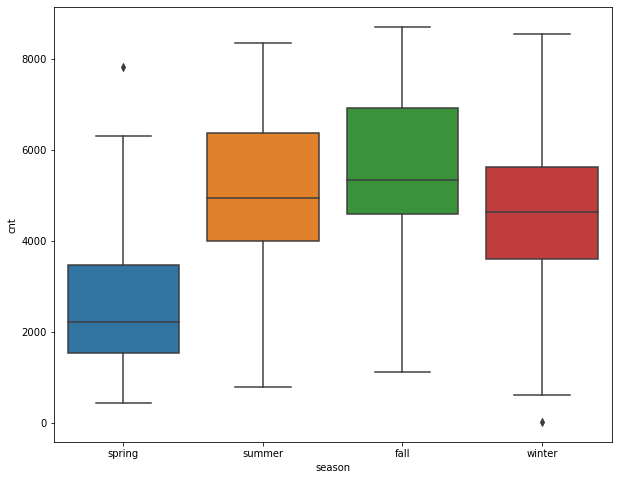

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(bike['season'],bike['cnt'])
plt.show()

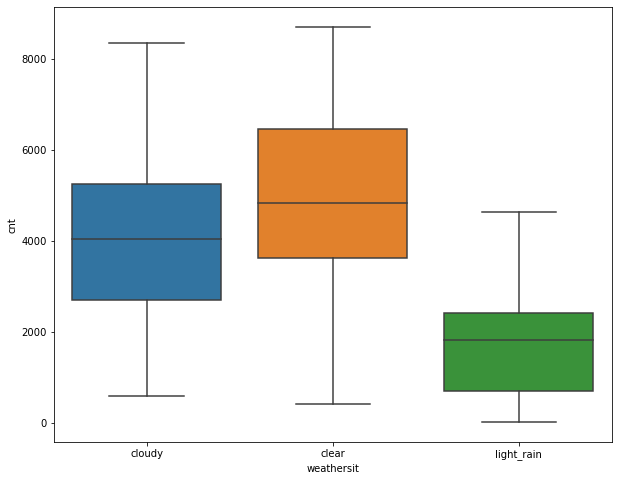

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(bike['weathersit'],bike['cnt'])
plt.show()

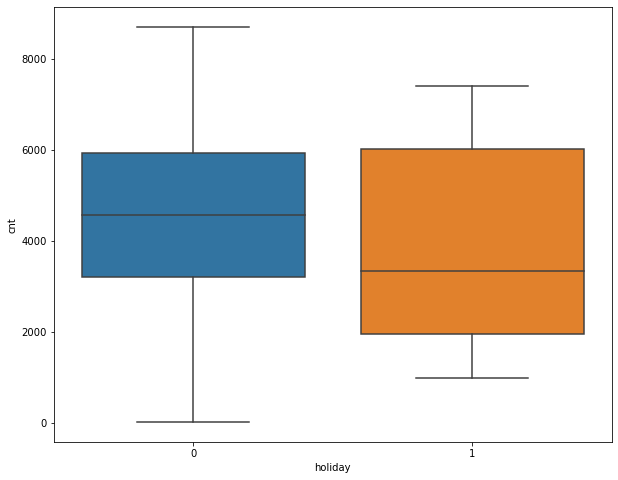

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(bike['holiday'],bike['cnt'])
plt.show()

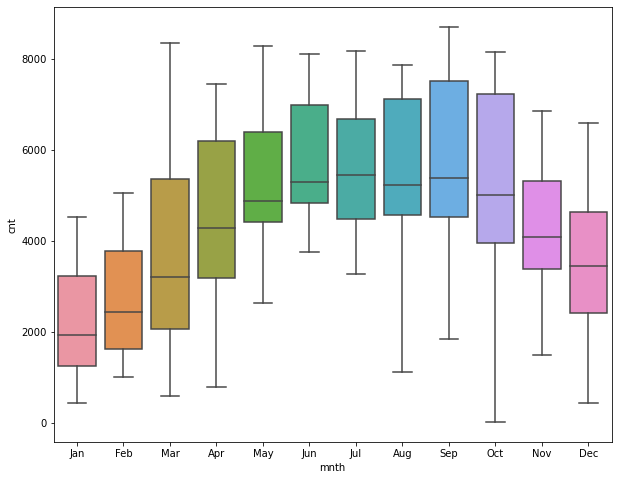

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(bike['mnth'],bike['cnt'])
plt.show()

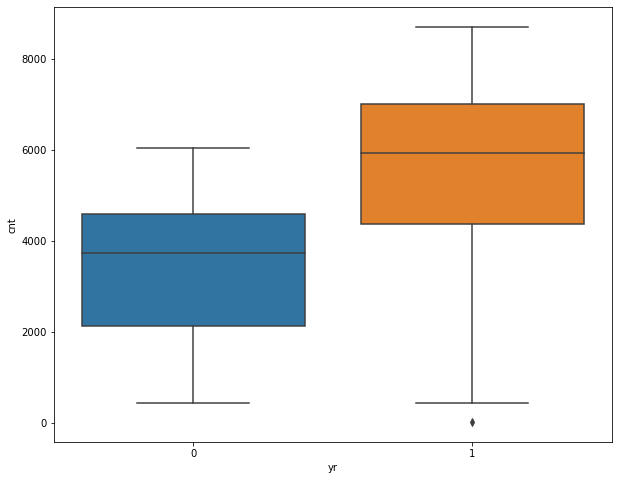

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(bike['yr'],bike['cnt'])
plt.show()

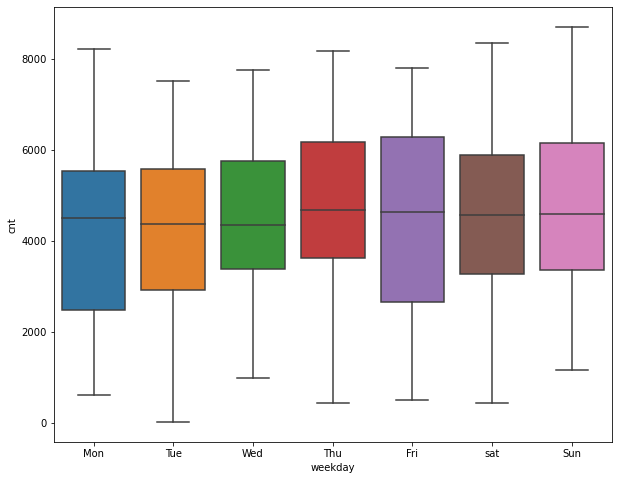

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(bike['weekday'],bike['cnt'])
plt.show()

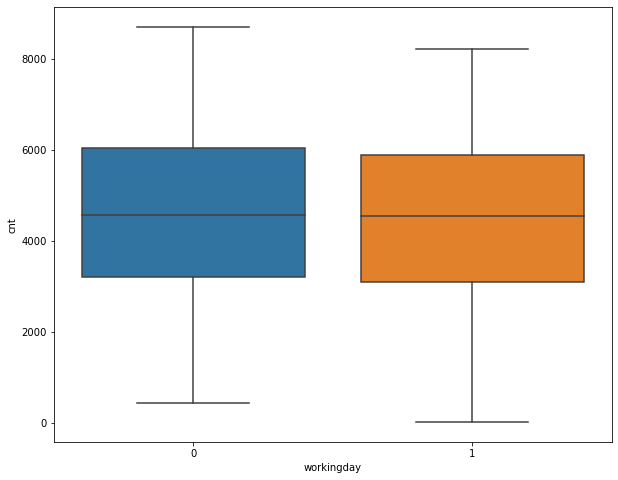

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(bike['workingday'],bike['cnt'])
plt.show()

In [26]:
bike[bike['season']=='winter']['mnth'].value_counts()

Oct    62
Nov    60
Dec    40
Sep    16
Name: mnth, dtype: int64

### Observations:

- 'Season' - Bike rental counts are increasing in the season summer and the counts are high in the season fall. Then started to decrease in the season winter. Bike rental counts are least in the season spring.
- ‘yr’ – We have increased in the bike rental counts when increasing in the year. 
- ‘mnth’ – Bike rental counts are started to increase in the month of March and the rental counts are at the peak in the month of September. The months January and February are having the least rental counts.
- ‘weathersit’ – When the weather is clear we are having a high number of bike rentals. When we have the weather light rain, we have the least number of rentals. Also, there is no record of rentals in the dataset for the weather heavy rain. This shows that people do not take rental bikes when there is heavy rain which is unfavourable for the user.
- ‘holiday’ – There is a drop in rental counts when there is a holiday.


### Pair plots

- Using pair plots to visualize the relation between the variables.

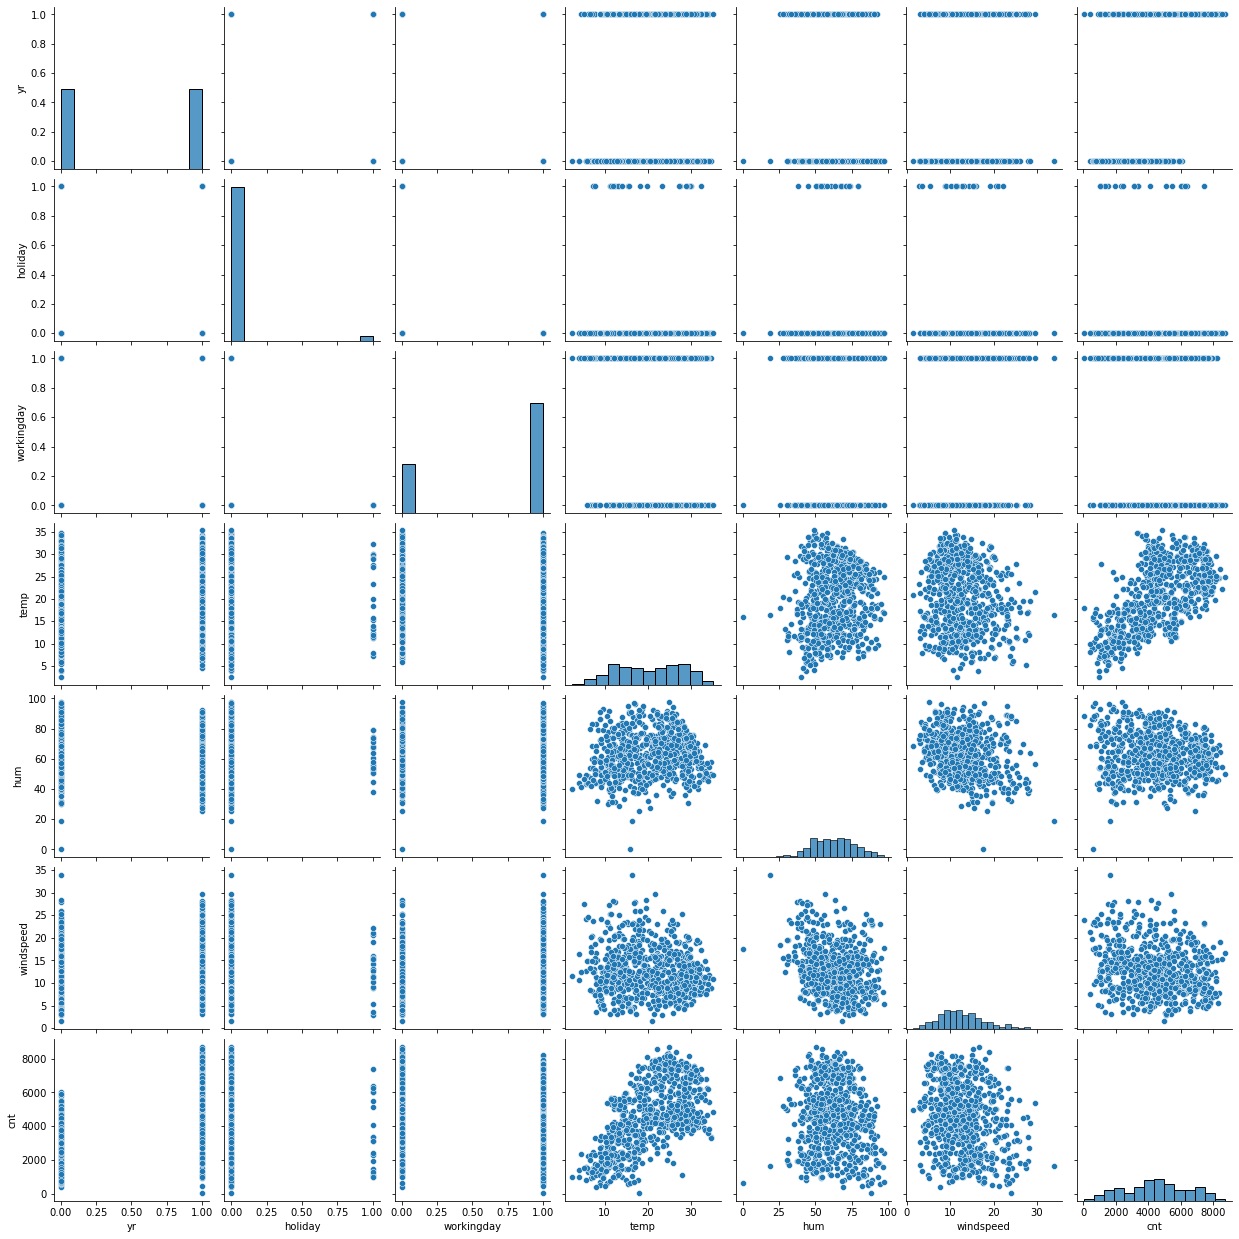

In [27]:
sns.pairplot(data = bike)
plt.show()

###  Observations

- We can see an increase in the rental counts in the second year (2019) of the dataset.

- More rentals are taken if the humidity is in the range between 50 to 80. If humidity is high we have more rental counts.

- More rentals are taken if the wind speed is in the range between 5 to 20. If wind speed is low we have more rental counts.

#### Regression plot

In [28]:
def reg_plot(x,y):
    plt.figure(figsize=(12,8))
    sns.regplot(data=bike,x=x,y=y)
    plt.title(x)

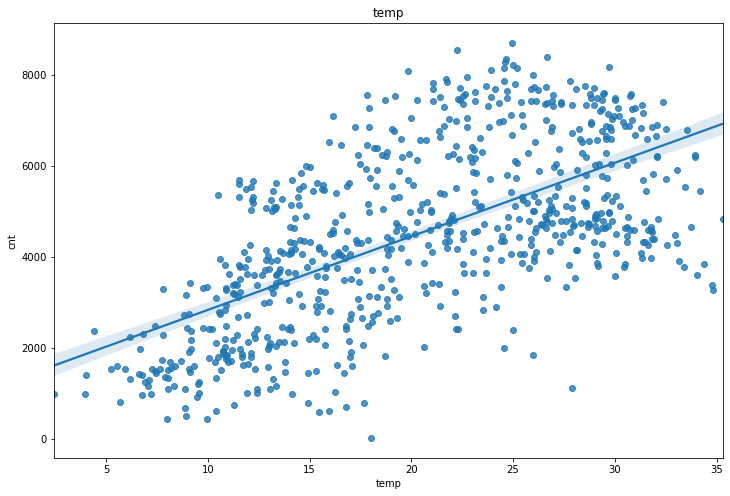

In [29]:
reg_plot('temp','cnt')

- There is a linear positive correlation between the rental count and temperature.

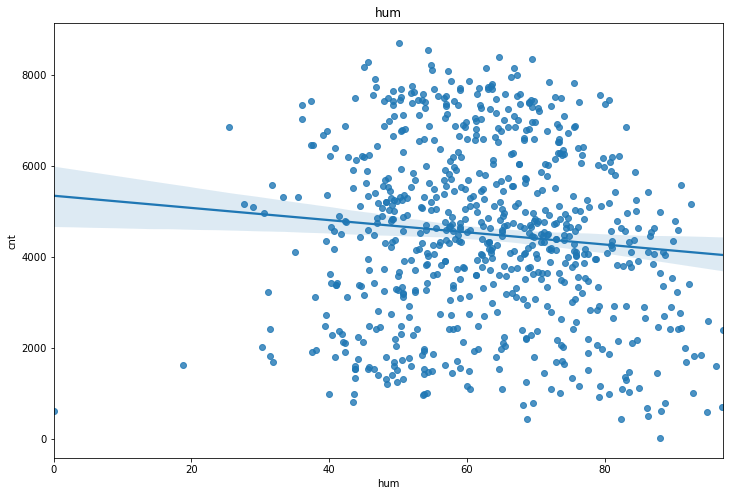

In [30]:
reg_plot('hum','cnt')

- Not able to see the visible linear correlation between humidity and rental count. Data points are spread across all regions. But, we could see that there is a small decline when the increase in humidity.

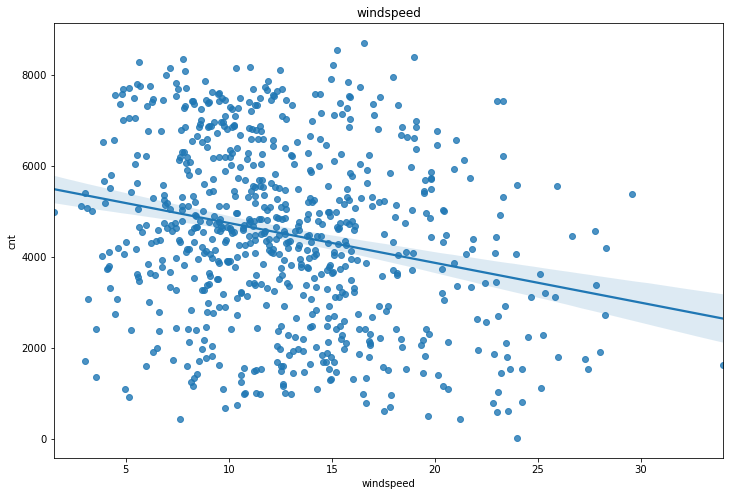

In [31]:
reg_plot('windspeed','cnt')

- There is a negative correlation between rental count and wind speed.

## Bivariate analysis

- Box and bar plotting

In [32]:
def bivariate_plotting(x,hue):
    
    plt.figure(figsize=(13,9))
    plt.subplot(1,2,1)
    sns.boxplot(x=x,y='cnt',data=bike,hue=hue)
    #plt.title(x,' vs cnt vs ',+hue)
    
    plt.subplot(1,2,2)
    sns.barplot(x=x,y='cnt',data=bike,hue=hue)
    #plt.title(str(x)+' vs cnt vs '+str(hue))

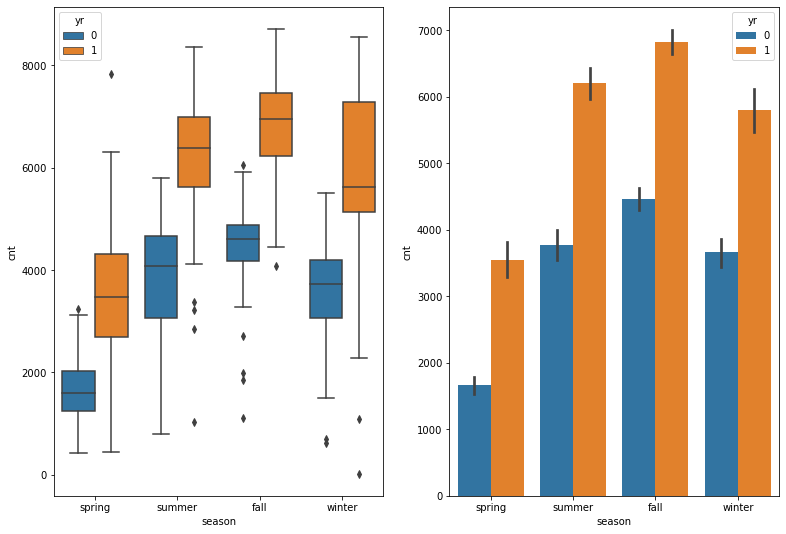

In [33]:
bivariate_plotting('season','yr')

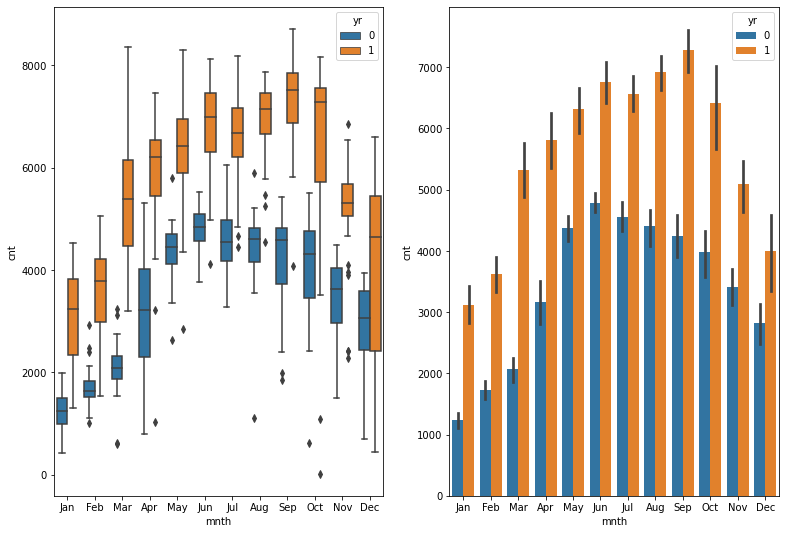

In [34]:
bivariate_plotting('mnth','yr')

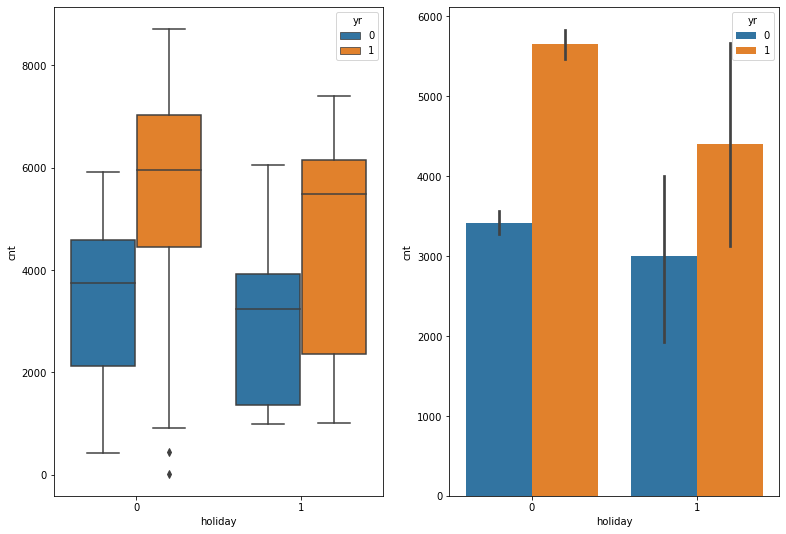

In [35]:
bivariate_plotting('holiday','yr')

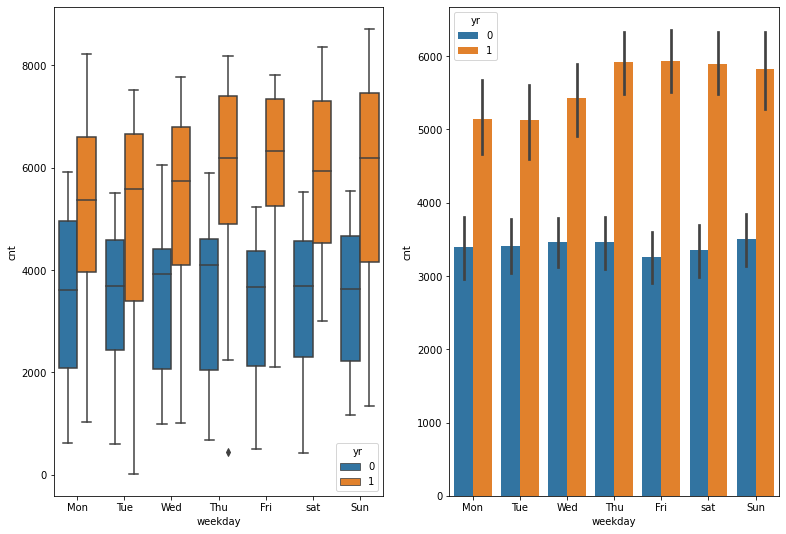

In [36]:
bivariate_plotting('weekday','yr')

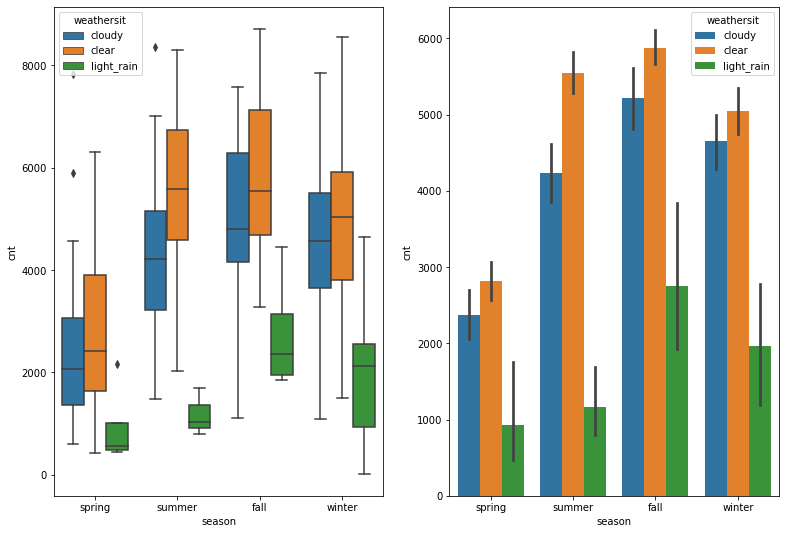

In [37]:
bivariate_plotting('season','weathersit')

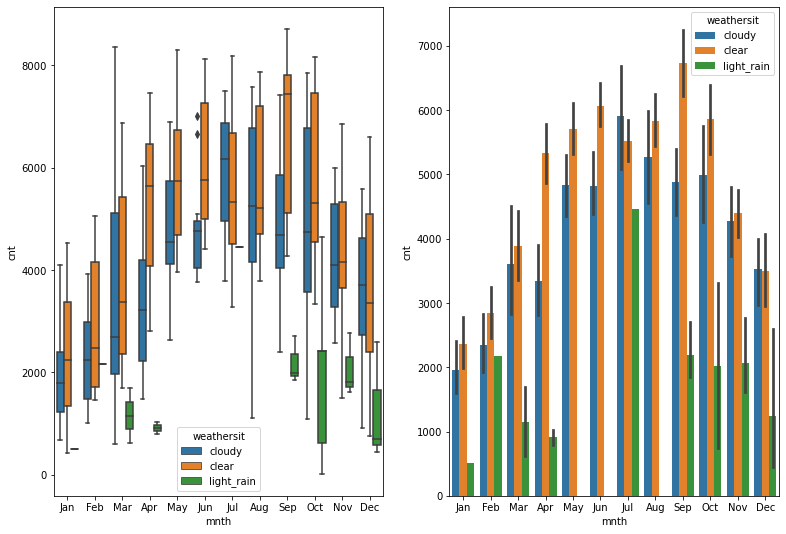

In [38]:
bivariate_plotting('mnth','weathersit')

### Observations:

- We could see seasonality in the bike rental count.
- From the month of March, we could see there is an increase in rental counts and in the month of October, the rental count started to decrease.
- Rental counts are high in the summer and fall seasons.
- If the weather is clear or cloudy, rental counts are higher and if there is light rain, we could see there are very low rental counts. Also, there are no rentals while there is heavy rain.

# Data preparation for modelling


In [39]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


In [40]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


- The categorical columns 'yr', 'holiday', 'workingday' are already in binary format. So, we don't need to convert them.

#### Creating dummy variables for categorical variables

- The columns 'season', 'mnth', 'weathersit' and 'weekday' have categorical labels and will create dummy variables for these columns.

In [41]:
bike = pd.get_dummies(data = bike,drop_first=True,columns= ['season','mnth','weekday'] )

In [42]:
bike = pd.get_dummies(data = bike,drop_first=True,columns= ['weathersit'])

- Dropping the first column will explain the particular categorical column with (n-1) dummy variables.
- In the column 'weathersit' we only have three categorical values (Cloudy, Clear, Light Rain) and instead of four ((Cloudy, Clear, Light Rain, Heavy Rain). So, are keeping the first columns.

In [43]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  mnth_Aug               730 non-null    uint8  
 11  mnth_Dec               730 non-null    uint8  
 12  mnth_Feb               730 non-null    uint8  
 13  mnth_Jan               730 non-null    uint8  
 14  mnth_Jul               730 non-null    uint8  
 15  mnth_J

- Categorical columns are converted into numerical columns with the dummy variables.

#### Splitting the dataset into train and test

In [44]:
bike_train, bike_test = train_test_split(bike, train_size=0.8, random_state = 100)

In [45]:
bike_train.shape

(584, 29)

In [46]:
bike_test.shape

(146, 29)

#### Scaling - training dataset
- Using MinMaxScaler to scale the independent variable values between 0 to 1.

In [47]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,weathersit_cloudy,weathersit_light_rain
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,20.107433,63.028458,12.790642,4505.267123,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.155822,0.130137,0.145548,0.159247,0.136986,0.119863,0.342466,0.027397
std,0.500241,0.163378,0.446377,7.414450,13.995222,5.239391,1958.617712,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.362997,0.336743,0.352955,0.366220,0.344128,0.325080,0.474941,0.163378
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.615413,52.000000,9.041851,3070.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.363326,63.437500,12.020905,4566.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.658538,73.010425,15.625154,6035.750000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Columns 'temp', 'hum' and 'windspeed' are not in binary and we will use the scaler method for these columns.

In [48]:
scaler = MinMaxScaler()

In [49]:
# fitting and transforming the data using the scaler object
bike_train[['temp','hum','windspeed']] = scaler.fit_transform(bike_train[['temp','hum','windspeed']])

In [50]:
bike_train[['temp','hum','windspeed']].describe()

,temp,hum,windspeed
count,584.000000,584.000000,584.000000
mean,0.537414,0.649499,0.319463
std,0.225336,0.144219,0.168114
min,0.000000,0.000000,0.000000
25%,0.340113,0.535852,0.199177
50%,0.545191,0.653714,0.294764
75%,0.736512,0.752361,0.410413
max,1.000000,1.000000,1.000000


- Completed the scaling and we have all independent variables are in the range between 0 to 1.

# Model building
 - Using both automated and manual approaches

### creating x_train and y_train

- X_train --> except the target column 'cnt'
- y_train --> target column 'cnt'

In [51]:
y_train = bike_train.pop('cnt')
x_train = bike_train

In [52]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,weathersit_cloudy,weathersit_light_rain
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
705,1,0,0,0.326094,0.787463,0.189819,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
379,1,0,1,0.133996,0.431945,0.449210,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


###  Building the model using RFE and linear regression functions.

- Using this automated approach to reduce the independent variable count to 15.

In [53]:
lm = LinearRegression()

In [54]:
lm.fit(x_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)

In [55]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 9),
 ('weekday_sat', False, 4),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light_rain', True, 1)]

In [56]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

In [57]:
x_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weekday_sat'],
      dtype='object')

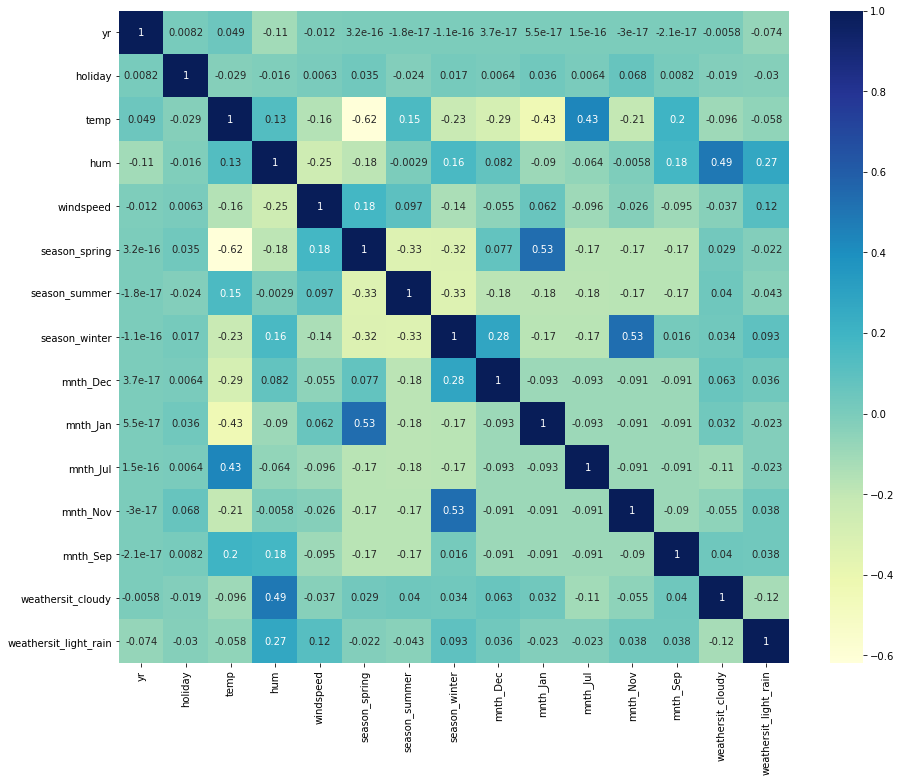

In [58]:
# correlation between the top 15 columns.
plt.figure(figsize = (15,12))
sns.heatmap(bike[col].corr(),annot=True,cmap="YlGnBu")
plt.show()

### Building model using statusmodel for detailed statistics

 - From the RFE model, we have 15 columns and we can use those columns to see the statistical values and reduce the column counts as per the significance.

In [59]:
x_train_rfe = x_train[col]

In [60]:
# Adding constant variable

x_train_rfe = sm.add_constant(x_train_rfe)

In [61]:
# Storing the columns used for this model in a variable 
cols_used1 = x_train_rfe.columns.drop('const')
x_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_cloudy,weathersit_light_rain
367,1.0,1,0,0.113228,0.454701,0.695175,1,0,0,0,1,0,0,0,0,0
648,1.0,1,0,0.468352,0.477458,0.299450,0,0,1,0,0,0,0,0,0,0
44,1.0,0,0,0.443431,0.387290,0.807474,1,0,0,0,0,0,0,0,0,0
705,1.0,1,0,0.326094,0.787463,0.189819,0,0,1,1,0,0,0,0,1,0
379,1.0,1,0,0.133996,0.431945,0.449210,1,0,0,0,1,0,0,0,0,0


### Model 1

In [62]:
# create a function to build model as per the input x_train data
def build_model(x_train):
    lm = sm.OLS(y_train, x_train).fit()
    print(lm.summary())
    return lm

Columns used - Model# 1:
    
    'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring','season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul','mnth_Nov', 'mnth_Sep', 'weathersit_cloudy', 'weathersit_light_rain'

In [63]:
# Running the linear model on the training data

lm1 =build_model(x_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          9.71e-222
Time:                        16:51:47   Log-Likelihood:                -4702.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2787.02

#### Observations

- Adjusted R-squared value is 84.5% percentage on training data.
- Also, the p-value of all variable are within 0.05.
- This is a good model and will validate the VIF value of each variable and drop them to improve the model.

#### Calculating VIF for each variable to find multicollinearity

In [64]:
# Creating function for VIF calculation to call this function whenever calculation VIF values
# we should not add a constant variable in the VIF calculation
# So, we can create a new data frame without 'const'

def vif_calc(x_input):
    x = x_input.drop('const',axis=1)
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [65]:
# Calculating VIF

vif_calc(x_train_rfe)

,Features,VIF
3,hum,31.19
2,temp,18.15
4,windspeed,4.70
5,season_spring,4.43
7,season_winter,3.80
6,season_summer,2.81
13,weathersit_cloudy,2.34
0,yr,2.11
11,mnth_Nov,1.74
9,mnth_Jan,1.71


- Dropping the variable 'hum' which is having a high VIF value and negative coefficient.

### Model 2

In [66]:
x_train_rfe = x_train_rfe.drop('hum',axis=1)
cols_used2 = x_train_rfe.columns.drop('const')

In [67]:
cols_used2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

Columns used - Model# 2:

    'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer','season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov','mnth_Sep', 'weathersit_cloudy', 'weathersit_light_rain'

In [68]:
# running the model and calculating VIF values for the current variables
lm2 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          8.39e-219
Time:                        16:51:47   Log-Likelihood:                -4712.4
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     569   BIC:                             9520.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2130.01

,Features,VIF
2,temp,5.34
3,windspeed,4.65
4,season_spring,2.87
6,season_winter,2.78
5,season_summer,2.28
0,yr,2.08
10,mnth_Nov,1.69
8,mnth_Jan,1.62
9,mnth_Jul,1.61
12,weathersit_cloudy,1.56


### Observations
- VIF values of the other predictors are reduced
- Comparing with model 1, there is a slight decrease in the adjusted R-squared value.

### Model 3
- Temperature is having a high correlation with the target variable count.
- So, dropping the column "season_summer" which is having a high p-value.

In [69]:
x_train_rfe = x_train_rfe.drop('season_summer',axis=1)
cols_used3 = x_train_rfe.columns.drop('const')

Columns used - Model# 3:

    'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter','mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep','weathersit_cloudy', 'weathersit_light_rain'

In [70]:
# running the model and calculating VIF values for the current variables
lm3 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.05e-218
Time:                        16:51:47   Log-Likelihood:                -4715.5
No. Observations:                 584   AIC:                             9459.
Df Residuals:                     570   BIC:                             9520.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2517.48

,Features,VIF
2,temp,4.73
3,windspeed,4.14
5,season_winter,2.36
4,season_spring,2.35
0,yr,2.07
9,mnth_Nov,1.69
7,mnth_Jan,1.61
11,weathersit_cloudy,1.53
6,mnth_Dec,1.42
8,mnth_Jul,1.36


### Observations
- VIF values of the other predictors are reduced. All variables are having VIF values are less than 5.
- Comparing with model 2, there is a slight decrease in adjusted R-squared value.

### Model 4
- Dropping the column "mnth_Jan" which is having a high p-value.

In [71]:
x_train_rfe = x_train_rfe.drop('mnth_Jan',axis=1)
cols_used4 = x_train_rfe.columns.drop('const')

In [72]:
cols_used4

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy',
       'weathersit_light_rain'],
      dtype='object')

Columns used - Model# 4:

    'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter','mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep','weathersit_cloudy', 'weathersit_light_rain'

In [73]:
# running the model and calculating VIF values for the current variables
lm4 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     248.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          9.59e-218
Time:                        16:51:47   Log-Likelihood:                -4720.6
No. Observations:                 584   AIC:                             9467.
Df Residuals:                     571   BIC:                             9524.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2335.27

,Features,VIF
2,temp,4.68
3,windspeed,4.14
5,season_winter,2.34
0,yr,2.06
4,season_spring,1.75
8,mnth_Nov,1.69
10,weathersit_cloudy,1.52
6,mnth_Dec,1.37
7,mnth_Jul,1.36
9,mnth_Sep,1.21


### Observations
- All variables are having VIF values are less than 5.
- Comparing with model 3, there is a slight decrease in adjusted R-squared value.

### Model 5
- Dropping the column "mnth_Sep" which is having a high p-value in the current set of predictors.

In [74]:
x_train_rfe = x_train_rfe.drop('mnth_Sep',axis=1)
cols_used5 = x_train_rfe.columns.drop('const')

Columns used - Model# 5:

    'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter','mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'weathersit_cloudy', 'weathersit_light_rain'

In [75]:
# running the model and calculating VIF values for the current variables
lm5 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     266.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          5.27e-217
Time:                        16:51:47   Log-Likelihood:                -4725.3
No. Observations:                 584   AIC:                             9475.
Df Residuals:                     572   BIC:                             9527.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2333.76

,Features,VIF
2,temp,4.31
3,windspeed,4.10
5,season_winter,2.33
0,yr,2.06
4,season_spring,1.75
8,mnth_Nov,1.67
9,weathersit_cloudy,1.51
6,mnth_Dec,1.36
7,mnth_Jul,1.31
10,weathersit_light_rain,1.07


### Observations
- All variables are having VIF values are less than 5.
- Comparing with model 4, there is a slight decrease in adjusted R-squared value.

### Model 6
- Dropping the column "mnth_Dec" which is having a high p-value in the current set of predictors.

In [76]:
x_train_rfe = x_train_rfe.drop('mnth_Dec',axis=1)
cols_used6 = x_train_rfe.columns.drop('const')

Columns used - Model# 6:

    'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Nov', 'weathersit_cloudy', 'weathersit_light_rain'

In [77]:
# running the model and calculating VIF values for the current variables
lm6 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     287.5
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          6.91e-216
Time:                        16:51:47   Log-Likelihood:                -4730.8
No. Observations:                 584   AIC:                             9484.
Df Residuals:                     573   BIC:                             9532.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2183.12

,Features,VIF
2,temp,4.28
3,windspeed,4.10
0,yr,2.06
5,season_winter,1.87
4,season_spring,1.70
7,mnth_Nov,1.52
8,weathersit_cloudy,1.51
6,mnth_Jul,1.31
9,weathersit_light_rain,1.07
1,holiday,1.05


### Observations
- All variables are having VIF values are less than 5.
- Comparing with model 5, there is a slight decrease in adjusted R-squared value.

### Model 7
- Dropping the column "mnth_Nov" which is having a high p-value (0.01) in the current set of predictors.

In [78]:
x_train_rfe = x_train_rfe.drop('mnth_Nov',axis=1)
cols_used7 = x_train_rfe.columns.drop('const')

Columns used - Model# 7:

    'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter','mnth_Jul', 'weathersit_cloudy', 'weathersit_light_rain'

In [79]:
# running the model and calculating VIF values for the current variables
lm7 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     315.6
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.06e-215
Time:                        16:51:47   Log-Likelihood:                -4734.2
No. Observations:                 584   AIC:                             9488.
Df Residuals:                     574   BIC:                             9532.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2116.61

,Features,VIF
2,temp,4.23
3,windspeed,4.04
0,yr,2.06
4,season_spring,1.69
7,weathersit_cloudy,1.51
5,season_winter,1.39
6,mnth_Jul,1.31
8,weathersit_light_rain,1.07
1,holiday,1.04


### Observations
- All variables are having VIF values are less than 5.
- Comparing with model 6, there is no much difference in the Adjusted R-squared.

### Model 8
- Dropping the column "temp" to check whether we can have major change in the adjusted R-squared.

In [80]:
x_train_rfe = x_train_rfe.drop('temp',axis=1)
cols_used8 = x_train_rfe.columns.drop('const')

Columns used - Model# 8:

    'yr', 'holiday', 'windspeed', 'season_spring', 'season_winter','mnth_Jul', 'weathersit_cloudy', 'weathersit_light_rain'

In [81]:
# running the model and calculating VIF values for the current variables
lm8 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     212.7
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.47e-166
Time:                        16:51:47   Log-Likelihood:                -4853.0
No. Observations:                 584   AIC:                             9724.
Df Residuals:                     575   BIC:                             9763.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5075.31

,Features,VIF
2,windspeed,2.56
0,yr,1.78
3,season_spring,1.54
6,weathersit_cloudy,1.42
4,season_winter,1.39
5,mnth_Jul,1.10
7,weathersit_light_rain,1.07
1,holiday,1.04


### Observations
- All variables are having VIF values are less than 5.
- But, the adjusted R-squared value is reduced by nearly 9% from model 7. Also, the p-value for the column 'mnth_Jul' is getting the p-value as 0.881 which is very high.

### Model 9

Building a model by removing the column 'mnth_Jul' and adding column 'temp'.

In [82]:
# using columns that are used in model#7 and removing the column 'mnth_Jul'
x_train_rfe = x_train[cols_used7]
x_train_rfe = x_train_rfe.drop('mnth_Jul',axis=1)

In [83]:
# Adding constant term in the dataset
x_train_rfe = sm.add_constant(x_train_rfe)
cols_used9 = x_train_rfe.columns.drop('const')

Columns used - Model# 9:

    'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter','weathersit_cloudy', 'weathersit_light_rain'

In [84]:
# running the model and calculating VIF values for the current variables
lm9 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     336.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          3.48e-211
Time:                        16:51:47   Log-Likelihood:                -4747.8
No. Observations:                 584   AIC:                             9514.
Df Residuals:                     575   BIC:                             9553.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2270.80

,Features,VIF
3,windspeed,4.00
2,temp,3.56
0,yr,2.05
4,season_spring,1.69
6,weathersit_cloudy,1.49
5,season_winter,1.36
7,weathersit_light_rain,1.07
1,holiday,1.04


### Model 10

Building a model by removing the column 'holiday' from the current dataset.

In [85]:
x_train_rfe = x_train_rfe.drop('holiday',axis=1)
cols_used10 = x_train_rfe.columns.drop('const')

Columns used - Model# 10:
    
    'yr', 'temp', 'windspeed', 'season_spring', 'season_winter','weathersit_cloudy', 'weathersit_light_rain'

In [86]:
# running the model and calculating VIF values for the current variables
lm10 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     371.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          9.47e-209
Time:                        16:51:47   Log-Likelihood:                -4756.6
No. Observations:                 584   AIC:                             9529.
Df Residuals:                     576   BIC:                             9564.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2263.51

,Features,VIF
2,windspeed,3.99
1,temp,3.56
0,yr,2.05
3,season_spring,1.67
5,weathersit_cloudy,1.48
4,season_winter,1.35
6,weathersit_light_rain,1.07


### Model 11
- Dropping the column "yr" to check whether we will have a huge change in the adjusted R-squared.

In [87]:
x_train_rfe = x_train_rfe.drop('yr',axis=1)
cols_used11 = x_train_rfe.columns.drop('const')

Columns used - Model# 11:

    'temp', 'windspeed', 'season_spring', 'season_winter','weathersit_cloudy', 'weathersit_light_rain'

In [88]:
# running the model and calculating VIF values for the current variables
lm11 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     120.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.38e-98
Time:                        16:51:47   Log-Likelihood:                -5017.2
No. Observations:                 584   AIC:                         1.005e+04
Df Residuals:                     577   BIC:                         1.008e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2879.95

,Features,VIF
1,windspeed,3.97
0,temp,3.03
2,season_spring,1.62
4,weathersit_cloudy,1.48
3,season_winter,1.33
5,weathersit_light_rain,1.07


### Observations
- All variables are having VIF values are less than 5.
- But, the adjusted R-squared values is reduced by nearly 30% from model 7. So, we cannot use model 8 in our prediction.

### Model 12

Training the model with the 14 columns which are selected using RFE method, except 'temp' column.

In [89]:
# The columns selected using RFE method.
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

In [90]:
x_train_rfe = sm.add_constant(x_train[col])

In [91]:
# Removing 'temp' column from the training dataset
x_train_rfe = x_train_rfe.drop('temp',axis=1)
cols_used12 = x_train_rfe.columns.drop('const')

Columns used - Model# 12:

    'yr', 'holiday', 'hum', 'windspeed', 'season_spring', 'season_summer','season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov','mnth_Sep', 'weathersit_cloudy', 'weathersit_light_rain'

In [92]:
# running the model and calculating VIF values for the current variables
lm12 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     158.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          5.24e-186
Time:                        16:51:48   Log-Likelihood:                -4790.3
No. Observations:                 584   AIC:                             9611.
Df Residuals:                     569   BIC:                             9676.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5394.82

,Features,VIF
2,hum,9.18
3,windspeed,4.23
6,season_winter,3.37
4,season_spring,3.33
5,season_summer,2.69
0,yr,1.97
12,weathersit_cloudy,1.94
10,mnth_Nov,1.68
8,mnth_Jan,1.60
9,mnth_Jul,1.48


#### Observations

- If we remove the column 'temp' alone, the Adjusted R-squared value decreased below 0.8

### Model 13

- Moldel without the columns 'temp' and 'hum'

In [93]:
x_train_rfe = x_train_rfe.drop('hum',axis=1)
cols_used13 = x_train_rfe.columns.drop('const')

Columns used - Model# 13:

    'yr', 'holiday', 'windspeed', 'season_spring', 'season_summer','season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov','mnth_Sep', 'weathersit_cloudy', 'weathersit_light_rain'

In [94]:
# running the model and calculating VIF values for the current variables
lm13 = build_model(x_train_rfe)
vif_calc(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          5.20e-187
Time:                        16:51:48   Log-Likelihood:                -4790.6
No. Observations:                 584   AIC:                             9609.
Df Residuals:                     570   BIC:                             9670.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5218.04

,Features,VIF
2,windspeed,3.80
3,season_spring,2.87
5,season_winter,2.65
4,season_summer,2.01
0,yr,1.89
9,mnth_Nov,1.68
7,mnth_Jan,1.60
11,weathersit_cloudy,1.52
6,mnth_Dec,1.41
8,mnth_Jul,1.20


#### Observations

- VIF value of each predictor is lower than 5.

- p-value for the columns 'season_winter' and 'mnth_Jul' are very high.

If we reduce the columns from the current dataset, the adjusted R-squared value will not increase. So, we can stop trying new models by reducing the variables.

Comparing all 13 models, we have model# 10 which is having an adjusted R-squared value of 81.6% with minimal predictor variables and all variables have zero p-values.
So, we can use model# 10 and the predictor variables to predict the target variable. 

# Residual analysis

In [95]:
# Columns used in the model# 10
cols_used10

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

In [96]:
x_train_final = x_train[cols_used10]

In [97]:
# Adding constant in the x_train
x_train_final = sm.add_constant(x_train_final)

In [98]:
# Predicting y values using x_train
y_train_pred = lm10.predict(x_train_final)

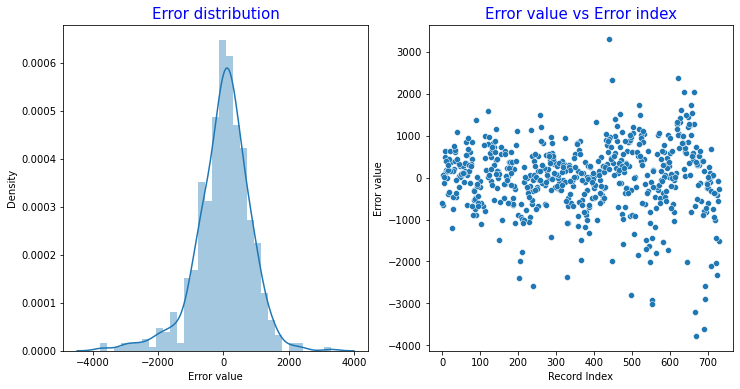

In [99]:
res = y_train - y_train_pred

# Plotting distribution of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(res)
plt.title('Error distribution',fontsize=15, fontdict = {'color':'blue'})
plt.xlabel('Error value')

plt.subplot(122)
sns.scatterplot(res.index, res)
plt.title('Error value vs Error index',fontsize=15, fontdict = {'color':'blue'})
plt.ylabel('Error value')
plt.xlabel('Record Index')
plt.show()

 -  Error/Residual values are normally distribution and with the mean value nearly zero. Also, we could see that there is no visual patter in error terms.

#### Visual comparison between y_test and predicted y with test data.

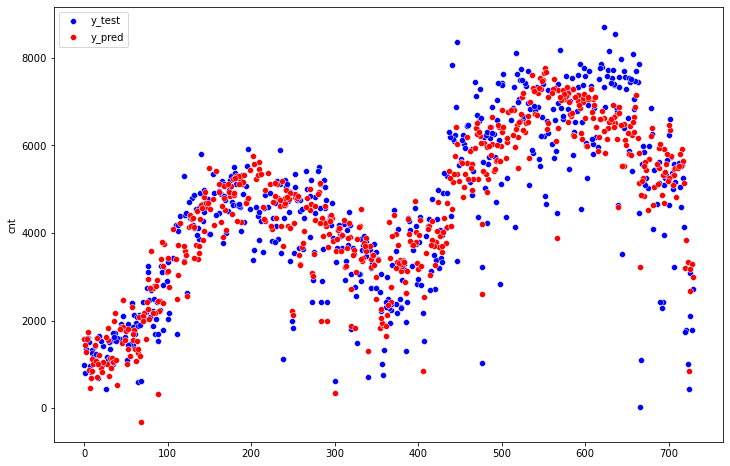

In [100]:
plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
sns.scatterplot(x=y_train.index,y=y_train,color='blue',label = 'y_test')
sns.scatterplot(x=y_train.index,y=y_train_pred,color='red',label = 'y_pred')
plt.legend(loc = 'upper left')
plt.show()

- Predicted values using training data are nearly in the same pattern. The model predictions are good with the training data.

### R2 - Score

In [101]:
r2_score(y_train, y_train_pred)

0.8184956767834511

- r2_score for the training data is 0.8185 which is a decent score 

# Making predictions

Make the prediction using model# 7 and analysis the results

#### Converting the scale of the test set

- Scaling the columns 'temp', 'hum' and 'windspeed' as per the training dataset.

In [102]:
bike_test[['temp','hum','windspeed']] = scaler.transform(bike_test[['temp','hum','windspeed']])

In [103]:
# Spliting the dataset into x_test and y_test
y_test = bike_test.pop('cnt')
x_test = bike_test

In [104]:
# Selecting the columns which are used to train

x_test= x_test[cols_used10]
x_test.head()

,yr,temp,windspeed,season_spring,season_winter,weathersit_cloudy,weathersit_light_rain
184,0,0.831783,0.084219,0,0,1,0
535,1,0.901354,0.153728,0,0,0,0
299,0,0.511964,0.334206,0,1,1,0
221,0,0.881625,0.339570,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0


In [105]:
# Adding constant to the test dataset

x_test_final = sm.add_constant(x_test)
x_test_final.head()

,const,yr,temp,windspeed,season_spring,season_winter,weathersit_cloudy,weathersit_light_rain
184,1.0,0,0.831783,0.084219,0,0,1,0
535,1.0,1,0.901354,0.153728,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0


In [106]:
y_pred = lm10.predict(x_test_final)

#### Visual comparison between y_test and predicted y with test data.

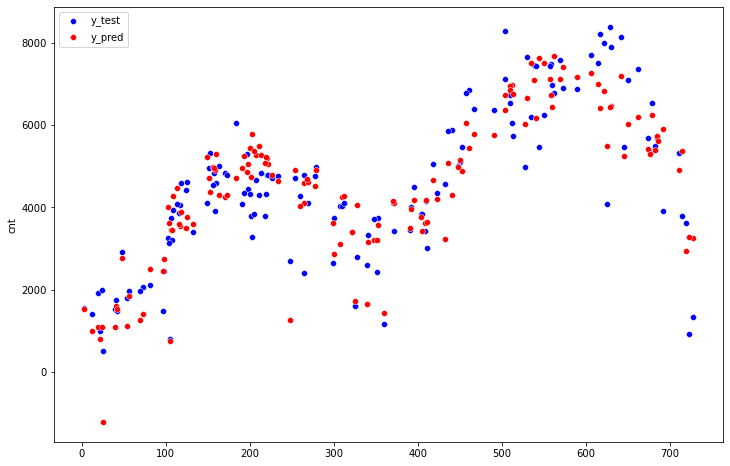

In [107]:
plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
sns.scatterplot(x=y_test.index,y=y_test,color='blue',label = 'y_test')
sns.scatterplot(x=y_test.index,y=y_pred,color='red',label = 'y_pred')

plt.legend(loc = 'upper left')
plt.show()

# Evaluation of the model

In [108]:
r2_score(y_test, y_pred)

0.7742745255278252

- r2_score for the test data is 0.7743 which is lesser than the training dataset's r2_score. We have a difference of 4% in r2_score between the train and test datasets.

In [109]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

875.5910301617666

#### Scatter plot using the y_test and y_pred.

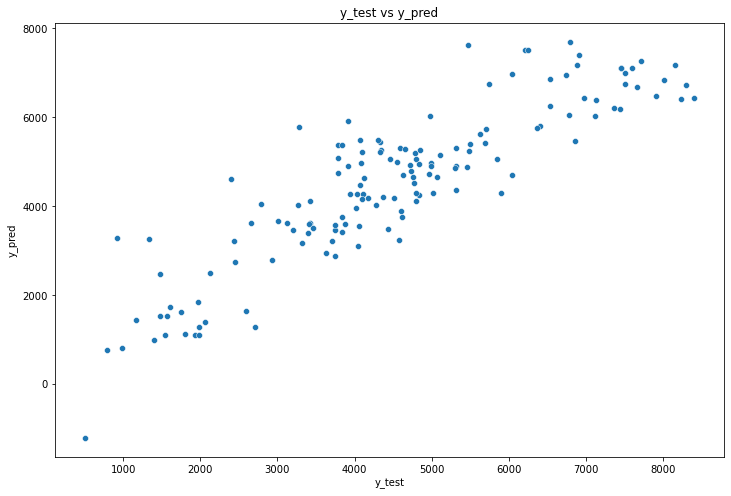

In [110]:
plt.figure(figsize= (12,8))
sns.scatterplot(y_test, y_pred)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Linear function (Best fit line)

In [111]:
# Coefficients of each predictor variable.
lm10.params

const                    2263.510448
yr                       2012.609278
temp                     3809.949918
windspeed               -1234.465544
season_spring           -1091.748713
season_winter             442.094233
weathersit_cloudy        -622.664759
weathersit_light_rain   -2472.878584
dtype: float64

##### cnt = 2263.5104 + (2012.6093 * yr)  + (3809.9499 * temp) - (1234.4655 * windspeed) - (1091.7487 * season_spring) + (442.0942 * season_winter) - (622.6648 * weathersit_cloudy) - (2472.8786 * weathersit_light_rain)

##### Positive coefficients:

An increase in the values of the variables the year, temperature and season_winter indicates that we will have the increase in the target variable 'cnt'.

##### Negative coefficients:

A decrease in the values of the variables windspeed, season_value, weathersit_cloudy and  weathersit_light_rain will indicate that there will be an increase in the target variable 'cnt'.

##### Top predictor variables:

- 'temp' is the top predictor variable which is having the highest coefficient. Followed by weathersit_light_rain and year.

-  Bike rentals are decreasing if the windspeed increases

- If the temperature increases we could see there is a significant increase in the bike rental count.

- if the weather is raining or cloudy, we could see bike rental counts are decreasing.

- Also, in the season spring, we could see that the bike rental counts are decreasing.

### Q-Q plot with y_test and y_train

Text(0.5, 1.0, 'y_test vs y_train')

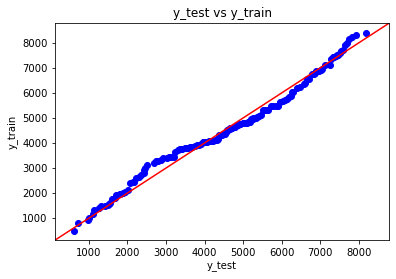

In [112]:
sm.qqplot_2samples(data1= y_test,data2 = y_train, xlabel = 'y_test', ylabel='y_train', line = '45')
plt.title('y_test vs y_train')

- We could see that all the points are near the 45-degree line. This datasets test and train are split from the same dataset and the above Q-Q plot explains the same.